In [1]:
# Load all libraries

import xarray
import pathlib
from os import listdir
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
# Find only the TREFHT files in the control files

files = glob.glob('/data/keeling/a/cristi/a/data/LENS/LE_control/*.TREFHT.*')
print(files[0:3])
# Process the datasets
control = xarray.open_mfdataset(files,combine="by_coords",use_cftime=True)
control

['/data/keeling/a/cristi/a/data/LENS/LE_control/b.e11.B1850C5CN.f09_g16.005.cam.h0.TREFHT.040001-049912.nc', '/data/keeling/a/cristi/a/data/LENS/LE_control/b.e11.B1850C5CN.f09_g16.005.cam.h0.TREFHT.050001-059912.nc', '/data/keeling/a/cristi/a/data/LENS/LE_control/b.e11.B1850C5CN.f09_g16.005.cam.h0.TREFHT.060001-069912.nc']


<xarray.Dataset>
Dimensions:       (time: 21612, lat: 192, lon: 288, ilev: 31, lev: 30,
                   slat: 191, slon: 288, nbnd: 2)
Coordinates:
  * ilev          (ilev) float64 2.255 5.032 10.16 18.56 ... 967.5 985.1 1e+03
  * lat           (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lev           (lev) float64 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
  * lon           (lon) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * slat          (slat) float64 -89.53 -88.59 -87.64 ... 87.64 88.59 89.53
  * slon          (slon) float64 -0.625 0.625 1.875 3.125 ... 355.6 356.9 358.1
  * time          (time) object 0400-02-01 00:00:00 ... 2201-01-01 00:00:00
Dimensions without coordinates: nbnd
Data variables: (12/32)
    P0            (time) float64 1e+05 1e+05 1e+05 1e+05 ... 1e+05 1e+05 1e+05
    TREFHT        (time, lat, lon) float32 dask.array<chunksize=(1200, 192, 288), meta=np.ndarray>
    ch4vmr        (time) float64 dask.array<chunksize=(1200,), meta=np.ndarray>
    co2vmr        (time) float64 dask.array<chunksize=(1200,), meta=np.ndarray>
    date          (time) int32 dask.array<chunksize=(1200,), meta=np.ndarray>
    date_written  (time) |S8 dask.array<chunksize=(1200,), meta=np.ndarray>
    ...            ...
    ntrn          (time) int32 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1
    sol_tsi       (time) float64 dask.array<chunksize=(1200,), meta=np.ndarray>
    time_bnds     (time, nbnd) object dask.array<chunksize=(1200, 2), meta=np.ndarray>
    time_written  (time) |S8 dask.array<chunksize=(1200,), meta=np.ndarray>
    w_stag        (time, slat) float64 dask.array<chunksize=(1200, 191), meta=np.ndarray>
    wnummax       (time, lat) int32 dask.array<chunksize=(1200, 192), meta=np.ndarray>
Attributes: (12/13)
    Conventions:               CF-1.0
    source:                    CAM
    case:                      b.e11.B1850C5CN.f09_g16.005
    title:                     UNSET
    logname:                   mai
    host:                      ys0442
    ...                        ...
    revision_Id:               $Id$
    initial_file:              /glade/p/cesm/cseg//inputdata/atm/cam/inic/fv/...
    topography_file:           /glade/p/cesm/cseg//inputdata/atm/cam/topo/USG...
    history:                   Fri Oct  4 21:16:06 2013: /glade/apps/opt/nco/...
    NCO:                       4.3.4
    nco_openmp_thread_number:  1

In [5]:
# Find the TREFHT files in the historical data
files_hist_complete = glob.glob('/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.*.TREFHT.192001-200512.nc')
files_hist = files_hist_complete[:-7] #No data from University of Toronto - 101-107 - Doesn't combine well with NCAR data
print(files_hist[0:3])
# Process the datasets
historical = xarray.open_mfdataset(files_hist,combine="nested",concat_dim='ensemble_mem',use_cftime=True)
historical

['/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.004.cam.h0.TREFHT.192001-200512.nc', '/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.003.cam.h0.TREFHT.192001-200512.nc', '/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.002.cam.h0.TREFHT.192001-200512.nc']


<xarray.Dataset>
Dimensions:              (cosp_prs: 7, nbnd: 2, cosp_tau: 7, cosp_scol: 10,
                          cosp_ht: 40, cosp_sr: 15, cosp_sza: 5,
                          cosp_htmisr: 16, cosp_tau_modis: 6, ensemble_mem: 34,
                          time: 1032, lat: 192, lon: 288, ilev: 31, lev: 30,
                          slat: 191, slon: 288)
Coordinates: (12/15)
  * cosp_prs             (cosp_prs) float64 900.0 740.0 620.0 ... 245.0 90.0
  * cosp_tau             (cosp_tau) float64 0.15 0.8 2.45 6.5 16.2 41.5 219.5
  * cosp_scol            (cosp_scol) float64 1.0 2.0 3.0 4.0 ... 8.0 9.0 10.0
  * cosp_ht              (cosp_ht) float64 240.0 720.0 ... 1.848e+04 1.896e+04
  * cosp_sr              (cosp_sr) float64 0.605 2.1 4.0 ... 539.5 1.004e+03
  * cosp_sza             (cosp_sza) float64 0.0 15.0 30.0 45.0 60.0
    ...                   ...
  * lat                  (lat) float64 -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * lev                  (lev) float64 3.643 7.595 14.36 ... 957.5 976.3 992.6
  * lon                  (lon) float64 0.0 1.25 2.5 3.75 ... 356.2 357.5 358.8
  * slat                 (slat) float64 -89.53 -88.59 -87.64 ... 88.59 89.53
  * slon                 (slon) float64 -0.625 0.625 1.875 ... 355.6 356.9 358.1
  * time                 (time) object 1920-02-01 00:00:00 ... 2006-01-01 00:...
Dimensions without coordinates: nbnd, ensemble_mem
Data variables: (12/38)
    cosp_prs_bnds        (cosp_prs, nbnd) float64 dask.array<chunksize=(7, 2), meta=np.ndarray>
    cosp_tau_bnds        (cosp_tau, nbnd) float64 dask.array<chunksize=(7, 2), meta=np.ndarray>
    cosp_ht_bnds         (cosp_ht, nbnd) float64 dask.array<chunksize=(40, 2), meta=np.ndarray>
    cosp_sr_bnds         (cosp_sr, nbnd) float64 dask.array<chunksize=(15, 2), meta=np.ndarray>
    cosp_htmisr_bnds     (cosp_htmisr, nbnd) float64 dask.array<chunksize=(16, 2), meta=np.ndarray>
    cosp_tau_modis_bnds  (cosp_tau_modis, nbnd) float64 dask.array<chunksize=(6, 2), meta=np.ndarray>
    ...                   ...
    ntrn                 (ensemble_mem) int32 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1
    sol_tsi              (ensemble_mem, time) float64 dask.array<chunksize=(1, 1032), meta=np.ndarray>
    time_bnds            (ensemble_mem, time, nbnd) object dask.array<chunksize=(1, 1032, 2), meta=np.ndarray>
    time_written         (ensemble_mem, time) |S8 dask.array<chunksize=(1, 1032), meta=np.ndarray>
    w_stag               (ensemble_mem, slat) float64 dask.array<chunksize=(1, 191), meta=np.ndarray>
    wnummax              (ensemble_mem, lat) int32 dask.array<chunksize=(1, 192), meta=np.ndarray>
Attributes: (12/13)
    Conventions:               CF-1.0
    source:                    CAM
    case:                      b.e11.B20TRC5CNBDRD.f09_g16.004
    title:                     UNSET
    logname:                   mai
    host:                      ys4731
    ...                        ...
    revision_Id:               $Id$
    initial_file:              b.e11.B20TRC5CNBDRD.f09_g16.001.cam.i.1920-01-...
    topography_file:           /glade/p/cesmdata/cseg/inputdata/atm/cam/topo/...
    history:                   Wed Sep 11 21:14:41 2013: /glade/apps/opt/nco/...
    NCO:                       4.3.4
    nco_openmp_thread_number:  1

In [8]:
#Control vertical motion

file_omega_control = '/data/keeling/a/cristi/a/data/LENS/LE_control/b.e11.B1850C5CN.f09_g16.005.cam.h0.OMEGA.210001-220012.nc'
control_omega = xarray.open_dataset(file_omega_control,use_cftime=True)
control_omega

<xarray.Dataset>
Dimensions:       (lev: 30, ilev: 31, time: 1212, lat: 192, lon: 288,
                   slat: 191, slon: 288, nbnd: 2)
Coordinates:
  * lev           (lev) float64 3.643 7.595 14.36 24.61 ... 957.5 976.3 992.6
  * ilev          (ilev) float64 2.255 5.032 10.16 18.56 ... 967.5 985.1 1e+03
  * time          (time) object 2100-02-01 00:00:00 ... 2201-01-01 00:00:00
  * lat           (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
  * lon           (lon) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * slat          (slat) float64 -89.53 -88.59 -87.64 ... 87.64 88.59 89.53
  * slon          (slon) float64 -0.625 0.625 1.875 3.125 ... 355.6 356.9 358.1
Dimensions without coordinates: nbnd
Data variables: (12/32)
    hyam          (lev) float64 ...
    hybm          (lev) float64 ...
    hyai          (ilev) float64 ...
    hybi          (ilev) float64 ...
    P0            float64 ...
    date          (time) int32 ...
    ...            ...
    n2ovmr        (time) float64 ...
    f11vmr        (time) float64 ...
    f12vmr        (time) float64 ...
    sol_tsi       (time) float64 ...
    nsteph        (time) int32 ...
    OMEGA         (time, lev, lat, lon) float32 ...
Attributes:
    Conventions:      CF-1.0
    source:           CAM
    case:             b.e11.B1850C5CN.f09_g16.005
    title:            UNSET
    logname:          mai
    host:             ys0752
    Version:          $Name$
    revision_Id:      $Id$
    initial_file:     /glade/p/cesm/cseg//inputdata/atm/cam/inic/fv/cami-mam3...
    topography_file:  /glade/p/cesm/cseg//inputdata/atm/cam/topo/USGS-gtopo30...

In [9]:
# Get the historical vertical motion datasets

files_omega_complete = glob.glob('/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.*.OMEGA.192001-200512.nc')
files_omega = files_omega_complete[:-7] #No data from University of Toronto - 101-107 - Doesn't combine well with NCAR data
print(files_omega[0:3])
# Process the datasets
omega = xarray.open_mfdataset(files_omega,combine="nested",concat_dim='ensemble_mem',use_cftime=True)
omega

['/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.002.cam.h0.OMEGA.192001-200512.nc', '/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.003.cam.h0.OMEGA.192001-200512.nc', '/data/keeling/a/cristi/a/data/LENS/LE_hist/b.e11.B20TRC5CNBDRD.f09_g16.004.cam.h0.OMEGA.192001-200512.nc']


<xarray.Dataset>
Dimensions:              (cosp_prs: 7, nbnd: 2, cosp_tau: 7, cosp_scol: 10,
                          cosp_ht: 40, cosp_sr: 15, cosp_sza: 5,
                          cosp_htmisr: 16, cosp_tau_modis: 6, ensemble_mem: 34,
                          time: 1032, lev: 30, lat: 192, lon: 288, ilev: 31,
                          slat: 191, slon: 288)
Coordinates: (12/15)
  * cosp_prs             (cosp_prs) float64 900.0 740.0 620.0 ... 245.0 90.0
  * cosp_tau             (cosp_tau) float64 0.15 0.8 2.45 6.5 16.2 41.5 219.5
  * cosp_scol            (cosp_scol) float64 1.0 2.0 3.0 4.0 ... 8.0 9.0 10.0
  * cosp_ht              (cosp_ht) float64 240.0 720.0 ... 1.848e+04 1.896e+04
  * cosp_sr              (cosp_sr) float64 0.605 2.1 4.0 ... 539.5 1.004e+03
  * cosp_sza             (cosp_sza) float64 0.0 15.0 30.0 45.0 60.0
    ...                   ...
  * lat                  (lat) float64 -90.0 -89.06 -88.12 ... 88.12 89.06 90.0
  * lev                  (lev) float64 3.643 7.595 14.36 ... 957.5 976.3 992.6
  * lon                  (lon) float64 0.0 1.25 2.5 3.75 ... 356.2 357.5 358.8
  * slat                 (slat) float64 -89.53 -88.59 -87.64 ... 88.59 89.53
  * slon                 (slon) float64 -0.625 0.625 1.875 ... 355.6 356.9 358.1
  * time                 (time) object 1920-02-01 00:00:00 ... 2006-01-01 00:...
Dimensions without coordinates: nbnd, ensemble_mem
Data variables: (12/38)
    cosp_prs_bnds        (cosp_prs, nbnd) float64 dask.array<chunksize=(7, 2), meta=np.ndarray>
    cosp_tau_bnds        (cosp_tau, nbnd) float64 dask.array<chunksize=(7, 2), meta=np.ndarray>
    cosp_ht_bnds         (cosp_ht, nbnd) float64 dask.array<chunksize=(40, 2), meta=np.ndarray>
    cosp_sr_bnds         (cosp_sr, nbnd) float64 dask.array<chunksize=(15, 2), meta=np.ndarray>
    cosp_htmisr_bnds     (cosp_htmisr, nbnd) float64 dask.array<chunksize=(16, 2), meta=np.ndarray>
    cosp_tau_modis_bnds  (cosp_tau_modis, nbnd) float64 dask.array<chunksize=(6, 2), meta=np.ndarray>
    ...                   ...
    ntrn                 (ensemble_mem) int32 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1
    sol_tsi              (ensemble_mem, time) float64 dask.array<chunksize=(1, 1032), meta=np.ndarray>
    time_bnds            (ensemble_mem, time, nbnd) object dask.array<chunksize=(1, 1032, 2), meta=np.ndarray>
    time_written         (ensemble_mem, time) |S8 dask.array<chunksize=(1, 1032), meta=np.ndarray>
    w_stag               (ensemble_mem, slat) float64 dask.array<chunksize=(1, 191), meta=np.ndarray>
    wnummax              (ensemble_mem, lat) int32 dask.array<chunksize=(1, 192), meta=np.ndarray>
Attributes: (12/13)
    Conventions:               CF-1.0
    source:                    CAM
    case:                      b.e11.B20TRC5CNBDRD.f09_g16.002
    title:                     UNSET
    logname:                   mai
    host:                      ys1329
    ...                        ...
    revision_Id:               $Id$
    initial_file:              b.e11.B20TRC5CNBDRD.f09_g16.001.cam.i.1920-01-...
    topography_file:           /glade/p/cesm/cseg//inputdata/atm/cam/topo/USG...
    history:                   Tue Aug 13 10:43:44 2013: /glade/apps/opt/nco/...
    NCO:                       4.3.4
    nco_openmp_thread_number:  1

## Processing omega data

In [10]:
# Getting vertical velocity at around 500 mb

omega_500 = omega['OMEGA'].sel(lev=524.687175, method='nearest')
omega_500

<xarray.DataArray 'OMEGA' (ensemble_mem: 34, time: 1032, lat: 192, lon: 288)>
dask.array<getitem, shape=(34, 1032, 192, 288), dtype=float32, chunksize=(1, 1032, 192, 288), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
    lev      float64 524.7
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * time     (time) object 1920-02-01 00:00:00 ... 2006-01-01 00:00:00
Dimensions without coordinates: ensemble_mem
Attributes:
    mdims:         1
    units:         Pa/s
    long_name:     Vertical velocity (pressure)
    cell_methods:  time: mean

In [11]:
# Only the last 30 years - average over those years 

omega_500_last30 = omega_500.sel(time=slice("1976","2006"))
omega_averaged_time = omega_500_last30.mean('time')
omega_averaged_time

<xarray.DataArray 'OMEGA' (ensemble_mem: 34, lat: 192, lon: 288)>
dask.array<mean_agg-aggregate, shape=(34, 192, 288), dtype=float32, chunksize=(1, 192, 288), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
    lev      float64 524.7
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
Dimensions without coordinates: ensemble_mem

In [12]:
# Average over ensemble members

omega_averaged = omega_averaged_time.mean('ensemble_mem')
omega_averaged

<xarray.DataArray 'OMEGA' (lat: 192, lon: 288)>
dask.array<mean_agg-aggregate, shape=(192, 288), dtype=float32, chunksize=(192, 288), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
    lev      float64 524.7
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8

In [13]:
# Compute

omega_averaged.load()
print(omega_averaged)

<xarray.DataArray 'OMEGA' (lat: 192, lon: 288)>
array([[-0.00065632, -0.00065632, -0.00065632, ..., -0.00065632,
        -0.00065632, -0.00065632],
       [-0.00354737, -0.00367282, -0.00369522, ..., -0.00267125,
        -0.00302047, -0.00332354],
       [ 0.01222138,  0.01208865,  0.01193358, ...,  0.01253631,
         0.01243667,  0.01233596],
       ...,
       [-0.00047996, -0.00043941, -0.00039858, ..., -0.00059823,
        -0.00055958, -0.00052006],
       [-0.00265366, -0.00277356, -0.00289154, ..., -0.00228347,
        -0.00240916, -0.00253222],
       [-0.00335131, -0.00335131, -0.00335131, ..., -0.00335131,
        -0.00335131, -0.00335131]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
    lev      float64 524.7
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8


## Processing control omega data

In [15]:
# Averaging

control_omega_500 = control_omega['OMEGA'].sel(lev=524.687175, method='nearest')
control_omega_averaged = control_omega_500.sel(time=slice("2100","2200")).mean('time') #Average over one hundred years
control_omega_averaged

<xarray.DataArray 'OMEGA' (lat: 192, lon: 288)>
array([[-0.00033696, -0.00033696, -0.00033696, ..., -0.00033696,
        -0.00033696, -0.00033696],
       [-0.0034403 , -0.00355061, -0.00355863, ..., -0.00262069,
        -0.00294918, -0.00323539],
       [ 0.01275059,  0.01265655,  0.01253425, ...,  0.01295013,
         0.01288696,  0.0128254 ],
       ...,
       [-0.00077305, -0.00070883, -0.00064444, ..., -0.00095914,
        -0.00089904, -0.00083658],
       [-0.00336579, -0.00348747, -0.00360354, ..., -0.00299453,
        -0.00311989, -0.00324226],
       [-0.00351121, -0.00351121, -0.00351121, ..., -0.00351121,
        -0.00351121, -0.00351121]], dtype=float32)
Coordinates:
    lev      float64 524.7
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8

In [16]:
control_omega_averaged.load()
print(control_omega_averaged)

<xarray.DataArray 'OMEGA' (lat: 192, lon: 288)>
array([[-0.00033696, -0.00033696, -0.00033696, ..., -0.00033696,
        -0.00033696, -0.00033696],
       [-0.0034403 , -0.00355061, -0.00355863, ..., -0.00262069,
        -0.00294918, -0.00323539],
       [ 0.01275059,  0.01265655,  0.01253425, ...,  0.01295013,
         0.01288696,  0.0128254 ],
       ...,
       [-0.00077305, -0.00070883, -0.00064444, ..., -0.00095914,
        -0.00089904, -0.00083658],
       [-0.00336579, -0.00348747, -0.00360354, ..., -0.00299453,
        -0.00311989, -0.00324226],
       [-0.00351121, -0.00351121, -0.00351121, ..., -0.00351121,
        -0.00351121, -0.00351121]], dtype=float32)
Coordinates:
    lev      float64 524.7
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8


## Processing variability data

In [17]:
# Control data

decad_means = control['TREFHT'].rolling(time=300, center=True).mean('time') #12*25 = 300 - 25 Years
control_interd_variability = decad_means.std('time')

In [18]:
# Compute

control_interd_variability.load()
print(control_interd_variability)

<xarray.DataArray 'TREFHT' (lat: 192, lon: 288)>
array([[0.1273539 , 0.11461394, 0.11467533, ..., 0.11461184, 0.12676613,
        0.11465865],
       [0.14538755, 0.14467824, 0.14624155, ..., 0.14092728, 0.15125085,
        0.15261395],
       [0.15446869, 0.129788  , 0.12992617, ..., 0.14409606, 0.14298017,
        0.12877804],
       ...,
       [0.27669904, 0.27733243, 0.27798674, ..., 0.27509886, 0.27563518,
        0.27614513],
       [0.27697283, 0.27717856, 0.277379  , ..., 0.2762998 , 0.27649266,
        0.27671567],
       [0.27849758, 0.27850372, 0.27852124, ..., 0.27848005, 0.27848288,
        0.2784916 ]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8


In [19]:
# Historical data

# Taking interdecadal means
decad_means_hist = historical['TREFHT'].rolling(time=300, center=True).mean('time') #12*25 = 300 - 25 Years
hist_interd_variability = decad_means_hist.std('time')
# I'll be taking the mean across the historical simulations.
historical_ensmeanvar = hist_interd_variability.mean('ensemble_mem')
historical_ensmeanvar

<xarray.DataArray 'TREFHT' (lat: 192, lon: 288)>
dask.array<mean_agg-aggregate, shape=(192, 288), dtype=float32, chunksize=(192, 288), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8

In [20]:
# Compute

historical_ensmeanvar.load()
print(historical_ensmeanvar)

<xarray.DataArray 'TREFHT' (lat: 192, lon: 288)>
array([[0.20389903, 0.20122568, 0.20118184, ..., 0.2011584 , 0.20387709,
        0.20113224],
       [0.21641256, 0.21713102, 0.23591381, ..., 0.23051181, 0.21953373,
        0.22488886],
       [0.22974317, 0.22637609, 0.2222216 , ..., 0.2364321 , 0.23318252,
        0.2344487 ],
       ...,
       [0.39088598, 0.39123544, 0.39160293, ..., 0.38988623, 0.39021766,
        0.39056855],
       [0.38815922, 0.3882796 , 0.38834566, ..., 0.38787523, 0.38803664,
        0.388067  ],
       [0.38494748, 0.38497213, 0.384982  , ..., 0.38487613, 0.3848878 ,
        0.38491902]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8


# Plotting

In [34]:
colored_lats = []
for latitude in omega_averaged['lat'].values:
    for i in range(288): #length of longitude
       colored_lats.append(latitude)
print(len(colored_lats))

55296


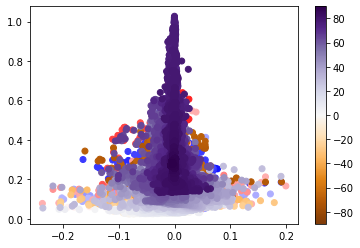

In [40]:
plt.scatter(omega_averaged,historical_ensmeanvar,c=colored_lats,cmap='bwr')
plt.scatter(control_omega_averaged,control_interd_variability,c=colored_lats,cmap='PuOr')
plt.colorbar()

Text(0.5, 1.0, 'Control')

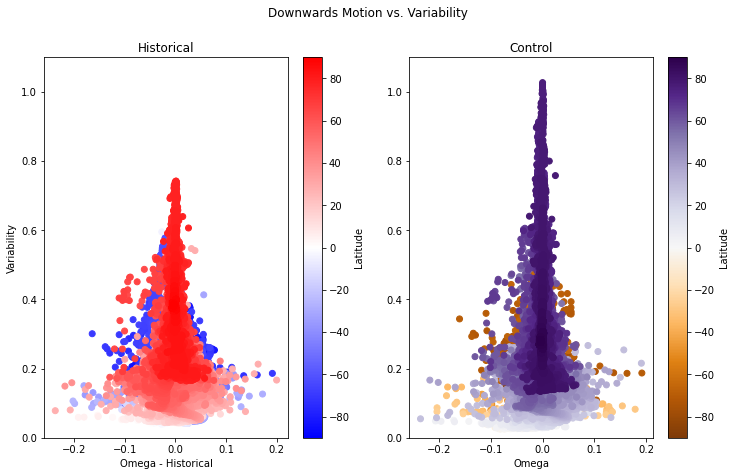

In [84]:
plt.rcParams['figure.figsize'] = [12, 7]

plt.suptitle('Downwards Motion vs. Variability')
plt.subplot(1,2,1)
plt.scatter(omega_averaged,historical_ensmeanvar,c=colored_lats,cmap='bwr')
plt.ylim(0,1.1)
cbar = plt.colorbar()
cbar.ax.set_ylabel('Latitude')
plt.ylabel('Variability')
plt.xlabel('Omega - Historical')
plt.title('Historical')
plt.subplot(1,2,2)
plt.scatter(control_omega_averaged,control_interd_variability,c=colored_lats,cmap='PuOr')
cbar = plt.colorbar()
cbar.ax.set_ylabel('Latitude')
plt.ylim(0,1.1)
plt.xlabel('Omega')
plt.title('Control')

In [50]:
diff_omega = omega_averaged - control_omega_averaged
diff_var = historical_ensmeanvar - control_interd_variability

Text(0.5, 1.0, 'Difference in upwards motion vs. change in variability from control to historical')

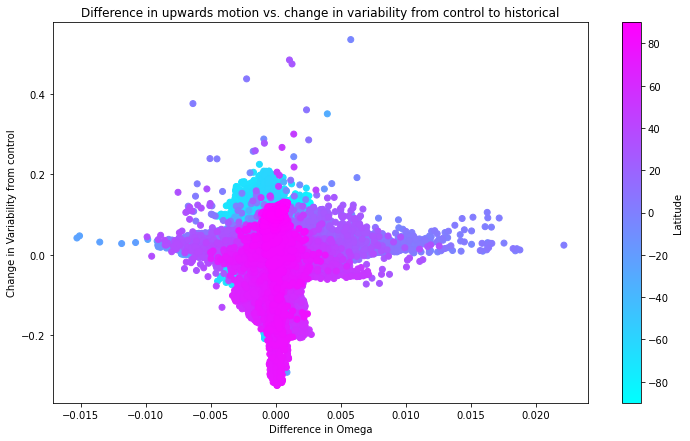

In [82]:
plt.scatter(diff_omega, diff_var, c=colored_lats,cmap='cool')
cbar = plt.colorbar()
cbar.ax.set_ylabel('Latitude')
plt.xlabel('Difference in Omega')
plt.ylabel('Change in Variability from control')
plt.title('Difference in upwards motion vs. change in variability from control to historical')

Text(0, 0.5, 'Variability')

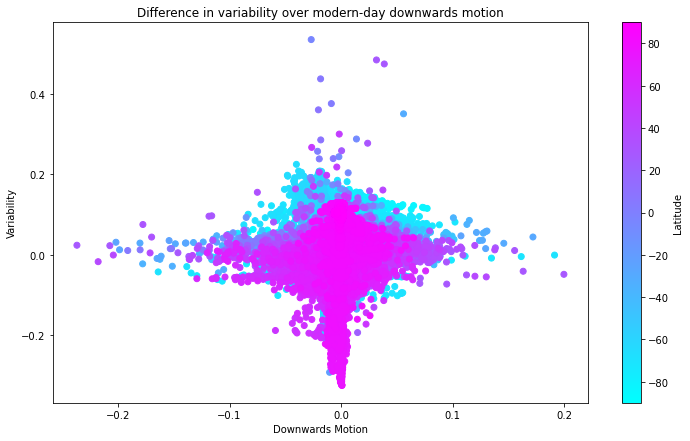

In [85]:
plt.scatter(omega_averaged, diff_var, c=colored_lats,cmap='cool')
cbar = plt.colorbar()
cbar.ax.set_ylabel('Latitude')
plt.title('Difference in variability over modern-day downwards motion')
plt.xlabel('Downwards Motion')
plt.ylabel('Variability Change')

In [55]:
percent_change = ((diff_var)/control_interd_variability)*100

Text(0, 0.5, 'Percentage Change in variability')

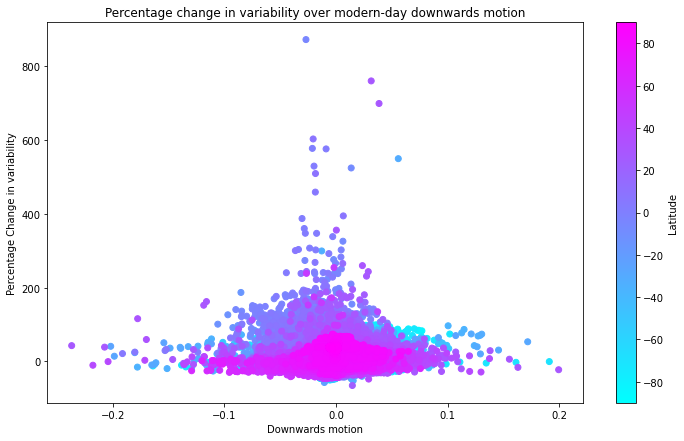

In [86]:
plt.scatter(omega_averaged, percent_change, c=colored_lats,cmap='cool')
cbar = plt.colorbar()
cbar.ax.set_ylabel('Latitude')
plt.title('Percentage change in variability over modern-day downwards motion')
plt.xlabel('Downwards motion')
plt.ylabel('Percentage Change in variability')

Text(0.5, 1.0, 'Change in omega vs. percentage change in variability')

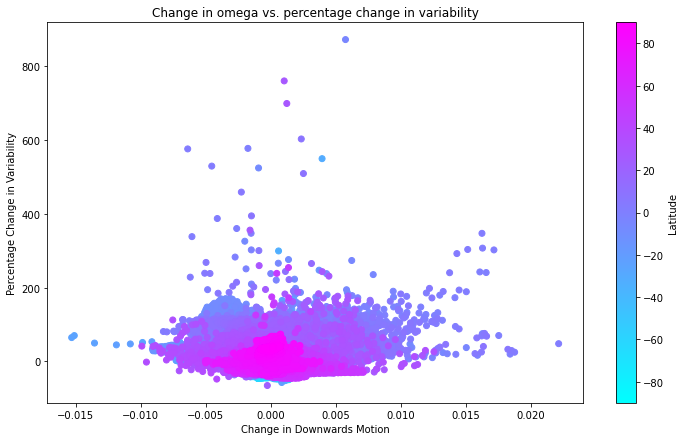

In [88]:
plt.scatter(diff_omega, percent_change, c=colored_lats,cmap='cool')
cbar = plt.colorbar()
cbar.ax.set_ylabel('Latitude')
plt.xlabel('Change in Downwards Motion')
plt.ylabel('Percentage Change in Variability')
plt.title('Change in omega vs. percentage change in variability')

In [89]:
central_lats = percent_change.sel(lat=slice(-30,30))
central_lats
omega_central = omega_averaged.sel(lat=slice(-30,30))

In [90]:
colored_cen_lats = []
for latitude in central_lats['lat'].values:
    for i in range(288): #length of longitude
       colored_cen_lats.append(latitude)
print(len(colored_cen_lats))

18432


Text(0, 0.5, 'Percentage Change in Variability')

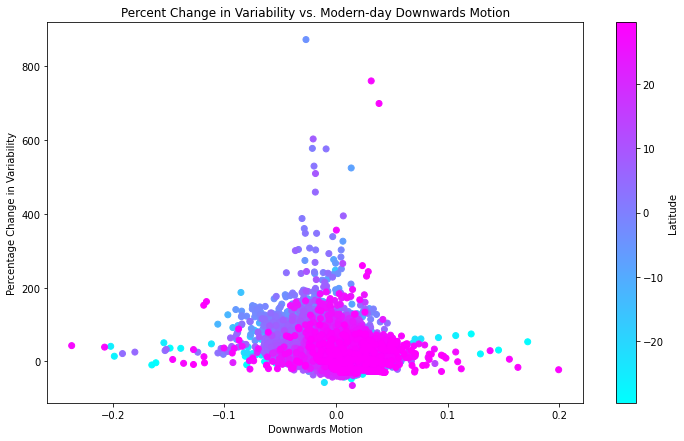

In [93]:
plt.scatter(omega_central,central_lats,c=colored_cen_lats,cmap='cool')
cbar = plt.colorbar()
cbar.ax.set_ylabel('Latitude')
plt.title('Percent Change in Variability vs. Modern-day Downwards Motion')
plt.xlabel('Downwards Motion')
plt.ylabel('Percentage Change in Variability')